### Importing the required Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools  
%matplotlib inline
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

### Importing the dataset into a variable ds

In [0]:
dataset=pd.read_excel("/content/drive/My Drive/Internship Project/Concrete_Data.xls")

### Information of the data

In [208]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### checking for NULL values

In [209]:
dataset.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

### checking the dimension of the data

In [210]:
print("shape =",dataset.shape,"\nrows =",dataset.shape[0],"\ncolumns =",dataset.shape[1])

shape = (1030, 9) 
rows = 1030 
columns = 9


### Checking the first 5 rows of ds

In [211]:
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Checking the last 5 rows of ds

In [212]:
dataset.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


### Renaming the columns

In [0]:
ds = dataset.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"furnace_slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"fly_ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"super_plasticizer",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse_agg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine_agg", 'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"compressive_strength"})

In [214]:
ds.columns

Index(['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
       'coarse_agg', 'fine_agg', 'age', 'compressive_strength'],
      dtype='object')

### Variables Summary

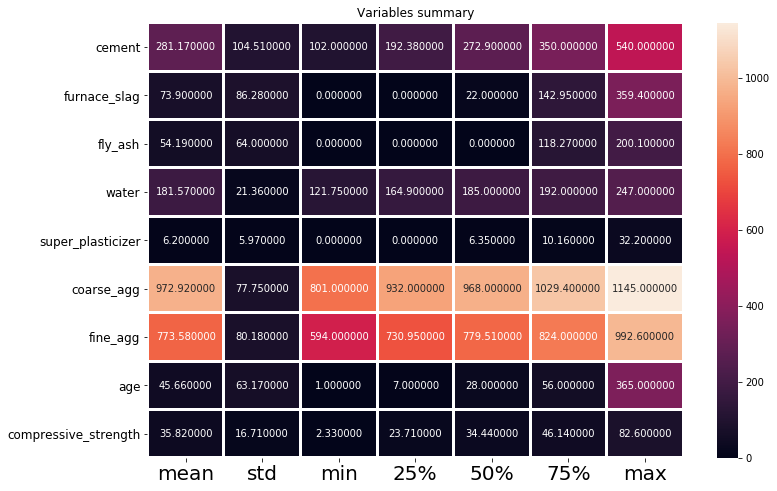

In [215]:
plt.figure(figsize=(12,8))
sns.heatmap(round(ds.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

### Pair Plots 

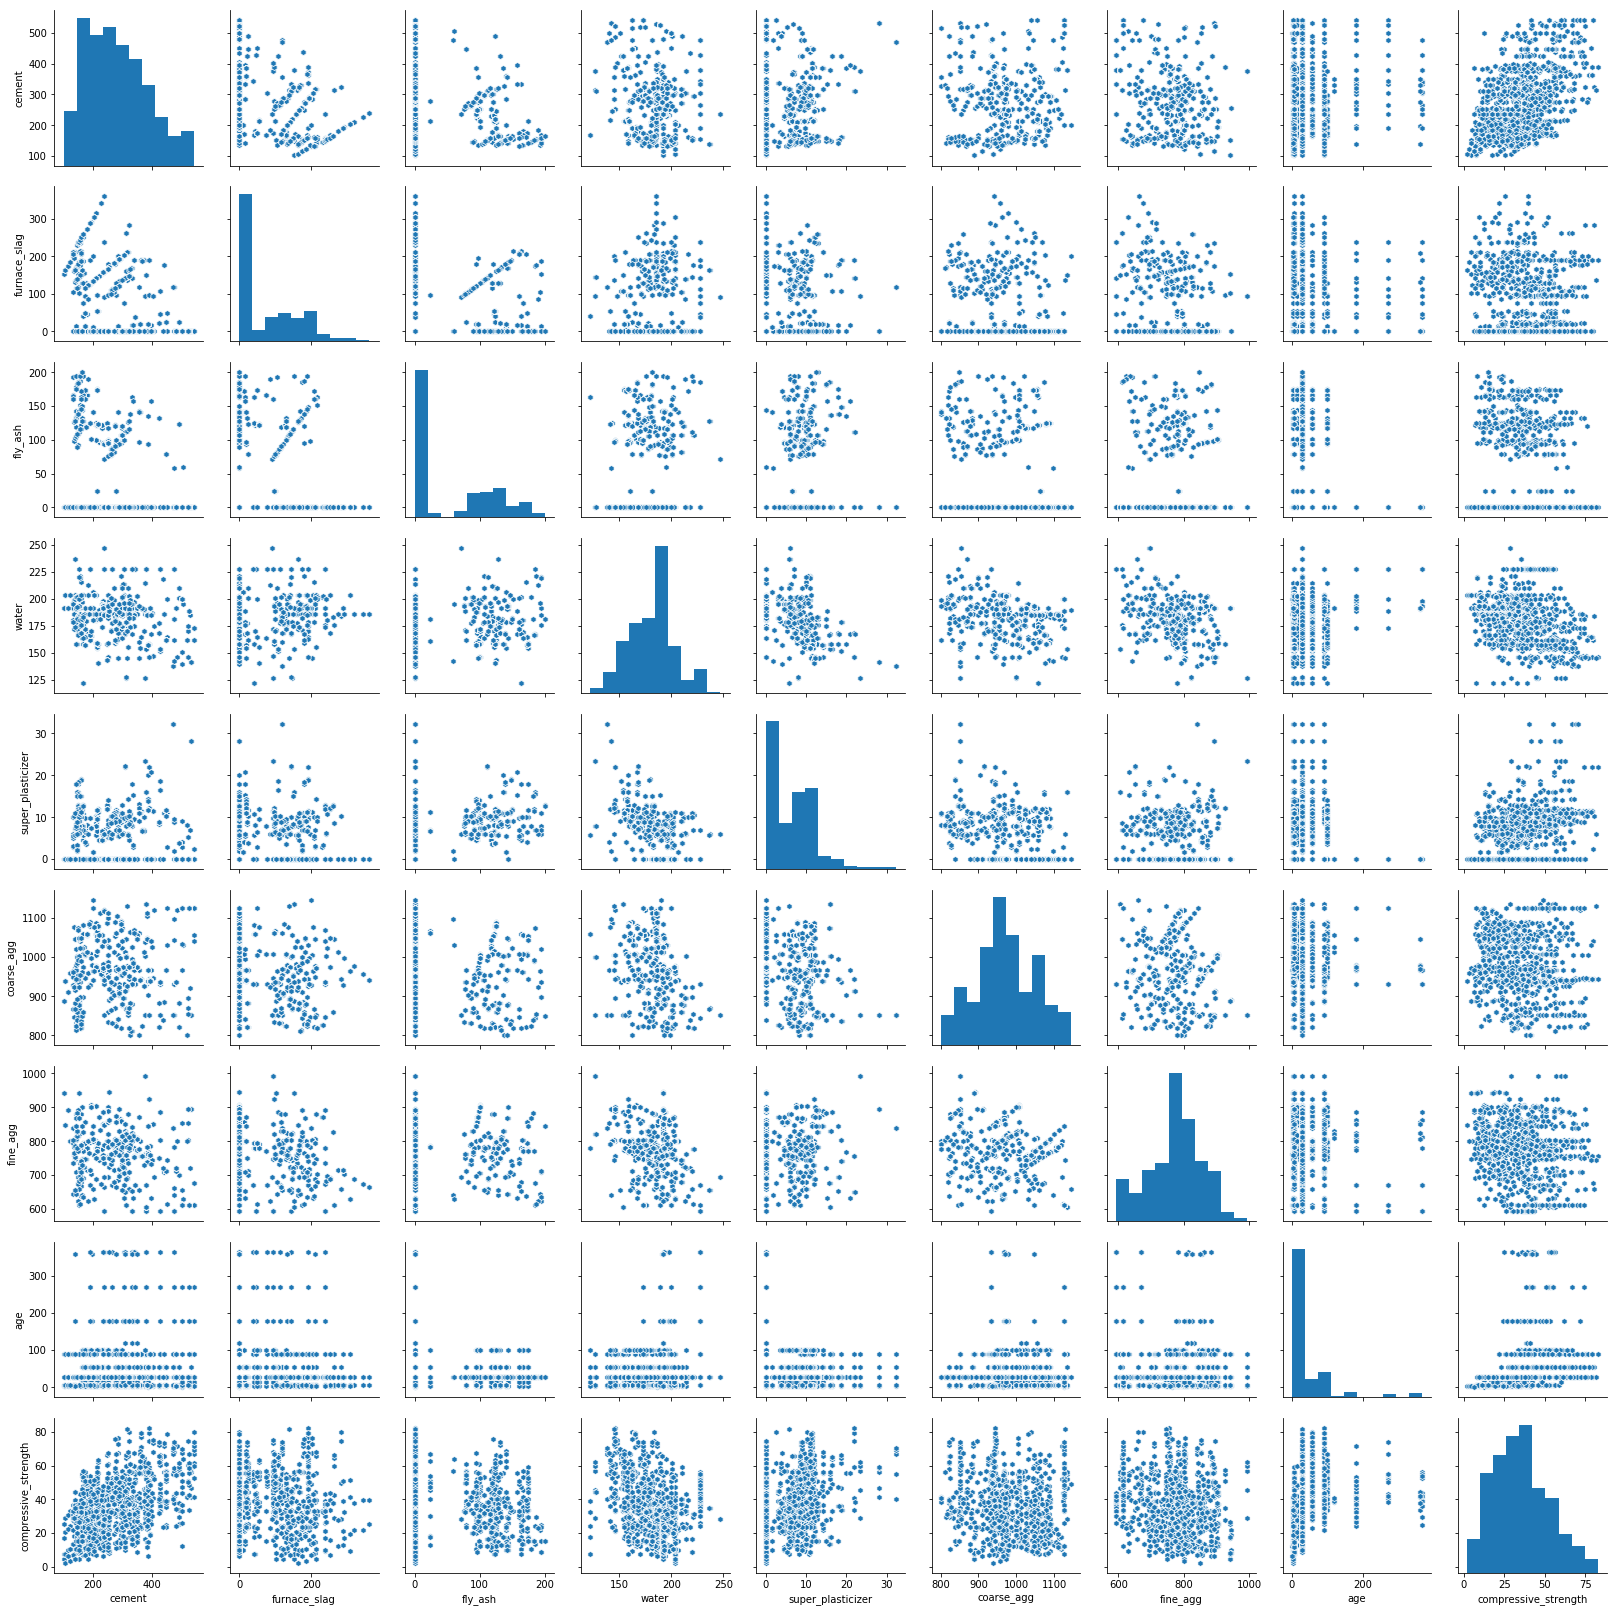

In [216]:
sns.pairplot(ds,markers="h")
plt.show()

### Pearson Correlation

In [217]:
data2=ds.corr('pearson')
data2['compressive_strength'].sort_values(ascending=False)

compressive_strength    1.000000
cement                  0.497833
super_plasticizer       0.366102
age                     0.328877
furnace_slag            0.134824
fly_ash                -0.105753
coarse_agg             -0.164928
fine_agg               -0.167249
water                  -0.289613
Name: compressive_strength, dtype: float64

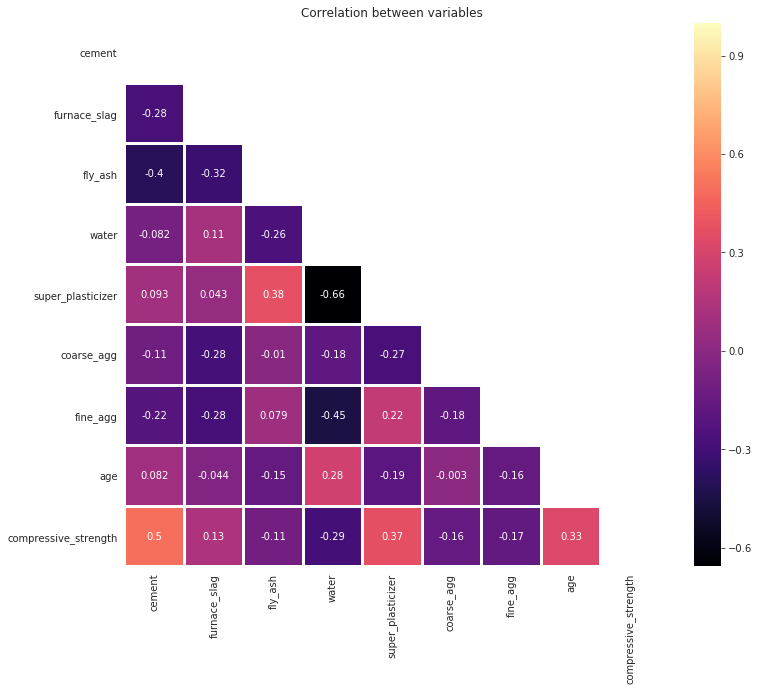

In [218]:
cor = ds.corr('pearson')
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlation between variables")
plt.show()

## Splitting the dataset
### Seperating the features and target

In [0]:
Y=ds['compressive_strength'] # target vector
X=ds.drop(['compressive_strength'],axis=1) # feature matrix

### Spltiing the dataset into test and train with 80:20 ratio

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [317]:
X_train.shape

(824, 8)

In [237]:
X_test.shape

(206, 8)

In [238]:
X_test.shape[0]+X_train.shape[0]

1030

In [239]:
Y_train.shape

(824,)

In [225]:
Y_test.shape

(206,)

In [240]:
Y_test.shape[0]+Y_train.shape[0]

1030

## Fiting the model
### XGBoost Regressor

In [309]:
xgr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgr.fit(X_train,Y_train)

[08:55:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Predicting train target for the train features

In [0]:
train_prediction = xgr.predict(X_train)

### Training RMSE and R2 score

In [321]:
r2_train=r2_score(Y_train, train_prediction)
rms=np.sqrt(mean_squared_error(Y_train,train_prediction))
print("Root Mean Squared Error :",rms,"\nR2 Score :",r2_train)

Root Mean Squared Error : 2.139182791838943 
R2 Score : 0.9836880370906599


### Prediciting test target for the test features

In [0]:
test_prediction = xgr.predict(X_test)

### Testing RMSE and R2 score

In [320]:
r2_test=r2_score(Y_test, test_prediction)
rms=np.sqrt(mean_squared_error(Y_test,test_prediction))
print("Root Mean Squared Error :",rms,"\nR2 Score :",r2_test)

Root Mean Squared Error : 4.33481332078709 
R2 Score : 0.9308485175375634


### Evaluate Predictions

In [325]:
labels=['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_agg', 'fine_agg', 'age']
s=input().split(' ')
s1 = pd.Series([float(s[0])], name='cement')
s2 = pd.Series([float(s[1])], name='furnace_slag')
s3 = pd.Series([float(s[2])], name='fly_ash')
s4 = pd.Series([float(s[3])], name='water')
s5 = pd.Series([float(s[4])], name='super_plasticizer')
s6 = pd.Series([float(s[5])], name='coarse_agg')
s7 = pd.Series([float(s[6])], name='fine_agg')
s8 = pd.Series([float(s[7])], name='age')
new = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8], axis=1)
predictions=xgr.predict(new)
#print("CEMENT STRENTH:\r")
print("Predicted Composite Concrete Strength =",predictions[0],"MPa")

276.4 	116.0 	90.3 	179.6 	8.9 	870.1 	768.3 	28
Predicted Composite Concrete Strength = 44.131325 MPa
